In [3]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [13]:
#vdw evolve utils
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))



def rotation_10(v):
    th = angle_between(v, np.array([1,0]))
    rotation = np.array( [[np.cos(-th), -np.sin(-th)],
                          [np.sin(-th), np.cos(-th)]])
    return rotation

def allign_along_10(celss):

    c = []
    for cel in celss:
        ro = rotation_10(np.array([cel[0][0], cel[1][0]]))
        c.append(np.dot(ro, cel))

    return c

In [64]:
_cell = np.array([[5.75, 0], [0, 5.92]])#np.array([[2.467, 2.467 / 2], [0, 2.467 * np.sqrt(3) / 2]])
cell = allign_along_10([_cell])[0]

cell

array([[5.75, 0.  ],
       [0.  , 5.92]])

In [81]:
def rectangle_transform(cell,steps,limit=0.0001):
    a1=cell.T[0]
    a2=cell.T[1]
    history={"m":[],"n":[], "d":[]}
    
    if a2[0]==0:
        history["m"].append(1)
        history["n"].append(1)
        history["d"].append(0.0)
        return np.array([[1,0],[0,1]]), history
        
    n=1
    for s in range(steps):
        p1= (n+s)*a1[0]
        m=int(-p1/a2[0])
        d= p1+m*a2[0]
        if d**2>=limit:
            history["m"].append(m)
            history["n"].append(n+s)
            history["d"].append(d)
        else:
            history["m"].append(m)
            history["n"].append(n+s)
            history["d"].append(d)
            return [[n,0],[0,m]],history
    
    return np.array([[0,0],[0,0]]), history
              

ta: [[1 0]
 [0 1]]
history {'m': [1], 'n': [1], 'd': [0.0]}


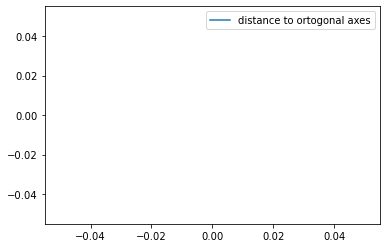

In [85]:
Ta, history = rectangle_transform(cell,steps=100,limit=0.00001)
print("ta:", Ta)
print("history", history)

plt.plot(history["d"], label="distance to ortogonal axes")
plt.legend()

In [ ]:
#
# May be used to speed up but i think the complexity is almost the same 
#

# def gcd(a, b, error):
#     while abs(b) > error:
#         t = b
#         b = a % b
#         a = t
#     return a

# def lcm(a, b, error):
#     return a * b / gcd(a, b, error)

